<a href="https://colab.research.google.com/github/virf96/Analisis_Texto/blob/master/Clusterizacion_texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
import requests
from bs4 import BeautifulSoup

## Indicamos de que página descargaremos los enunciados

In [162]:
main_url='http://www.medicosypacientes.com/opinion'
req=requests.get(main_url)
soup=BeautifulSoup(req.text,'html.parser')

In [163]:
#Página de donde hacemos el scrappng de información
soup.title.text

'Opinión | Médicos y Pacientes'

In [164]:
#Contenido del scrapping
soup.find_all('p')

[<p style="text-align: center;"><a href="https://www.fpsomc.es/sites/default/files/ampliacion-pretaciones-catalogo-2020.pdf"><img alt="" src="/sites/default/files/BannerMyP_850x130-PrestacionesExtraordinarias_conlogo_1.gif" style="width: 1200px; height: 140px;"/></a></p>,
 <p><a class="inscribete" href="http://eepurl.com/czk3e1" target="_blank" title="">Inscríbete</a></p>,
 <p>
 <div class="hemeroteca"><a href="/buscar">Hemeroteca</a></div></p>,
 <p style="text-align: justify;">El Dr. Jacinto Bátiz, director del Instituto para Cuidar Mejor Hospital San Juan de Dios de Santurtzi, analiza en este artículo el sufrimiento que ha creado la pandemia de COVID19 en los pacientes por encontrarse cerca de la muerte y lejos de sus familias</p>,
 <p style="text-align: justify;">El Dr. Alfonso Carmona, presidente del Colegio de Médicos de Sevilla, muestra su satisfacción con la medida anunciada por la Consejería de Salud y Familias de la Junta de Andalucía de extender el Complemento Específico por 

In [165]:
soup.find_all('p')[5]

<p style="text-align: justify;">El Dr. José Ignacio Landa,  Cirujano General y del Aparato Digestivo y miembro del Consejo Asesor del Consejo General de Colegios Oficiales de Médicos (CGCOM),  subraya en este artículo que “la Organización Mundial de la Salud (OMS) en los últimos años ha mostrado ciertas debilidades por la República Popular China y no parece que haya gestionado de una forma aceptable esta pandemia”</p>

In [166]:
#Tamaño de la lista
len(soup.find_all('p'))

30

In [167]:
print(soup.get_text())













Opinión | Médicos y Pacientes

@import url("http://www.medicosypacientes.com/modules/system/system.base.css?qec6xp");
@import url("http://www.medicosypacientes.com/modules/system/system.menus.css?qec6xp");
@import url("http://www.medicosypacientes.com/modules/system/system.messages.css?qec6xp");
@import url("http://www.medicosypacientes.com/modules/system/system.theme.css?qec6xp");


@import url("http://www.medicosypacientes.com/sites/all/modules/comment_notify/comment_notify.css?qec6xp");
@import url("http://www.medicosypacientes.com/sites/all/modules/adaptive_image/css/adaptive-image.css?qec6xp");
@import url("http://www.medicosypacientes.com/modules/aggregator/aggregator.css?qec6xp");
@import url("http://www.medicosypacientes.com/modules/comment/comment.css?qec6xp");
@import url("http://www.medicosypacientes.com/sites/all/modules/date/date_api/date.css?qec6xp");
@import url("http://www.medicosypacientes.com/sites/all/modules/fences/field.css?qec6xp");
@import url("http:/

## Prepricesamiento de información

In [168]:
hrefs=[]
for i in range(3,12):
  opinion=soup.find_all('p')[i]
  hrefs.append(opinion)


In [169]:
hrefs

[<p style="text-align: justify;">El Dr. Jacinto Bátiz, director del Instituto para Cuidar Mejor Hospital San Juan de Dios de Santurtzi, analiza en este artículo el sufrimiento que ha creado la pandemia de COVID19 en los pacientes por encontrarse cerca de la muerte y lejos de sus familias</p>,
 <p style="text-align: justify;">El Dr. Alfonso Carmona, presidente del Colegio de Médicos de Sevilla, muestra su satisfacción con la medida anunciada por la Consejería de Salud y Familias de la Junta de Andalucía de extender el Complemento Específico por Dedicación Exclusiva, de manera que lo puedan percibir todos los médicos con independencia de su régimen de compatibilidad de actividad.</p>,
 <p style="text-align: justify;">El Dr. José Ignacio Landa,  Cirujano General y del Aparato Digestivo y miembro del Consejo Asesor del Consejo General de Colegios Oficiales de Médicos (CGCOM),  subraya en este artículo que “la Organización Mundial de la Salud (OMS) en los últimos años ha mostrado ciertas de

### Partimos el texto para quedarnos solo con el comentario

In [170]:
str(hrefs[0]).split(">", 2)[1]

'El Dr. Jacinto Bátiz, director del Instituto para Cuidar Mejor Hospital San Juan de Dios de Santurtzi, analiza en este artículo el sufrimiento que ha creado la pandemia de COVID19 en los pacientes por encontrarse cerca de la muerte y lejos de sus familias</p'

In [171]:
comment=[]
for i in range(0,len(hrefs)):
  opinion=str(hrefs[i]).split(">", 2)[1]
  comment.append(opinion)


In [172]:
comment

['El Dr. Jacinto Bátiz, director del Instituto para Cuidar Mejor Hospital San Juan de Dios de Santurtzi, analiza en este artículo el sufrimiento que ha creado la pandemia de COVID19 en los pacientes por encontrarse cerca de la muerte y lejos de sus familias</p',
 'El Dr. Alfonso Carmona, presidente del Colegio de Médicos de Sevilla, muestra su satisfacción con la medida anunciada por la Consejería de Salud y Familias de la Junta de Andalucía de extender el Complemento Específico por Dedicación Exclusiva, de manera que lo puedan percibir todos los médicos con independencia de su régimen de compatibilidad de actividad.</p',
 'El Dr. José Ignacio Landa,\xa0 Cirujano General y del Aparato Digestivo y miembro del Consejo Asesor del Consejo General de Colegios Oficiales de Médicos (CGCOM),\xa0 subraya en este artículo que “la Organización Mundial de la Salud (OMS) en los últimos años ha mostrado ciertas debilidades por la República Popular China y no parece que haya gestionado de una forma a

In [173]:
str(comment[0]).split("<", 2)[0]

'El Dr. Jacinto Bátiz, director del Instituto para Cuidar Mejor Hospital San Juan de Dios de Santurtzi, analiza en este artículo el sufrimiento que ha creado la pandemia de COVID19 en los pacientes por encontrarse cerca de la muerte y lejos de sus familias'

In [174]:
comments=[]
for i in range(0,len(comment)):
  opinion=str(comment[i]).split("<", 2)[0]
  comments.append(opinion)


In [175]:
comments

['El Dr. Jacinto Bátiz, director del Instituto para Cuidar Mejor Hospital San Juan de Dios de Santurtzi, analiza en este artículo el sufrimiento que ha creado la pandemia de COVID19 en los pacientes por encontrarse cerca de la muerte y lejos de sus familias',
 'El Dr. Alfonso Carmona, presidente del Colegio de Médicos de Sevilla, muestra su satisfacción con la medida anunciada por la Consejería de Salud y Familias de la Junta de Andalucía de extender el Complemento Específico por Dedicación Exclusiva, de manera que lo puedan percibir todos los médicos con independencia de su régimen de compatibilidad de actividad.',
 'El Dr. José Ignacio Landa,\xa0 Cirujano General y del Aparato Digestivo y miembro del Consejo Asesor del Consejo General de Colegios Oficiales de Médicos (CGCOM),\xa0 subraya en este artículo que “la Organización Mundial de la Salud (OMS) en los últimos años ha mostrado ciertas debilidades por la República Popular China y no parece que haya gestionado de una forma aceptab

### Continuamos limpiando el texto de caracteres que no sirvan

In [176]:
import re

In [177]:
comments[2]

'El Dr. José Ignacio Landa,\xa0 Cirujano General y del Aparato Digestivo y miembro del Consejo Asesor del Consejo General de Colegios Oficiales de Médicos (CGCOM),\xa0 subraya en este artículo que “la Organización Mundial de la Salud (OMS) en los últimos años ha mostrado ciertas debilidades por la República Popular China y no parece que haya gestionado de una forma aceptable esta pandemia”'

In [178]:
#Quitamos sintaxis raras
a = comments[2]
b = "\xa0"
for char in b:
  a = a.replace(char,"")
print(a)


El Dr. José Ignacio Landa, Cirujano General y del Aparato Digestivo y miembro del Consejo Asesor del Consejo General de Colegios Oficiales de Médicos (CGCOM), subraya en este artículo que “la Organización Mundial de la Salud (OMS) en los últimos años ha mostrado ciertas debilidades por la República Popular China y no parece que haya gestionado de una forma aceptable esta pandemia”


In [179]:
#Sustituimos string
comments[2]=a

In [180]:
#Comentarios 
comments

['El Dr. Jacinto Bátiz, director del Instituto para Cuidar Mejor Hospital San Juan de Dios de Santurtzi, analiza en este artículo el sufrimiento que ha creado la pandemia de COVID19 en los pacientes por encontrarse cerca de la muerte y lejos de sus familias',
 'El Dr. Alfonso Carmona, presidente del Colegio de Médicos de Sevilla, muestra su satisfacción con la medida anunciada por la Consejería de Salud y Familias de la Junta de Andalucía de extender el Complemento Específico por Dedicación Exclusiva, de manera que lo puedan percibir todos los médicos con independencia de su régimen de compatibilidad de actividad.',
 'El Dr. José Ignacio Landa, Cirujano General y del Aparato Digestivo y miembro del Consejo Asesor del Consejo General de Colegios Oficiales de Médicos (CGCOM), subraya en este artículo que “la Organización Mundial de la Salud (OMS) en los últimos años ha mostrado ciertas debilidades por la República Popular China y no parece que haya gestionado de una forma aceptable esta 

## Procedemos a:
$\bullet$ Quitar signos de puntuación

$\bullet$ Poner todo en mínusculas

$\bullet$ Normalizar el texto **(steamming, lematización)**

$\bullet$ Eliminar palabras de parada

In [181]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
import string 
import random

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [182]:
raw=comments

In [183]:
#Convertimos a minúscula

commen=[]
for i in range(0,len(comments)):
  opinion=raw[i].lower() 
  commen.append(opinion)

In [184]:
commen

['el dr. jacinto bátiz, director del instituto para cuidar mejor hospital san juan de dios de santurtzi, analiza en este artículo el sufrimiento que ha creado la pandemia de covid19 en los pacientes por encontrarse cerca de la muerte y lejos de sus familias',
 'el dr. alfonso carmona, presidente del colegio de médicos de sevilla, muestra su satisfacción con la medida anunciada por la consejería de salud y familias de la junta de andalucía de extender el complemento específico por dedicación exclusiva, de manera que lo puedan percibir todos los médicos con independencia de su régimen de compatibilidad de actividad.',
 'el dr. josé ignacio landa, cirujano general y del aparato digestivo y miembro del consejo asesor del consejo general de colegios oficiales de médicos (cgcom), subraya en este artículo que “la organización mundial de la salud (oms) en los últimos años ha mostrado ciertas debilidades por la república popular china y no parece que haya gestionado de una forma aceptable esta 

In [185]:
#Quitamos palabras de parada
import sys
commentaries=[]

userstring = commen[0].split(" ")
list =["el","con","de","las","del","para","en","este","que","ha","la","en","los","por","sus","y","su","lo","una","esta","cómo","a"]
another_list = []
for x in userstring:
    if x not in list:           # Compara la lista y remueve
        another_list.append(x)  
m = " ".join(another_list)
commentaries.append(m)

userstring = commen[1].split(" ")
list =["el","con","de","las","del","para","en","este","que","ha","la","en","los","por","sus","y","su","lo","una","esta","cómo","a"]
another_list = []
for x in userstring:
    if x not in list:           # Compara la lista y remueve
        another_list.append(x)  
m = " ".join(another_list)
commentaries.append(m)

userstring = commen[2].split(" ")
list =["el","con","de","las","del","para","en","este","que","ha","la","en","los","por","sus","y","su","lo","una","esta","cómo","a"]
another_list = []
for x in userstring:
    if x not in list:           # Compara la lista y remueve
        another_list.append(x)  
m = " ".join(another_list)
commentaries.append(m)

userstring = commen[3].split(" ")
list =["el","con","de","las","del","para","en","este","que","ha","la","en","los","por","sus","y","su","lo","una","esta","cómo","a"]
another_list = []
for x in userstring:
    if x not in list:           # Compara la lista y remueve
        another_list.append(x)  
m = " ".join(another_list)
commentaries.append(m)

userstring = commen[4].split(" ")
list =["el","con","de","las","del","para","en","este","que","ha","la","en","los","por","sus","y","su","lo","una","esta","cómo","a"]
another_list = []
for x in userstring:
    if x not in list:           # Compara la lista y remueve
        another_list.append(x)  
m = " ".join(another_list)
commentaries.append(m)

userstring = commen[5].split(" ")
list =["el","con","de","las","del","para","en","este","que","ha","la","en","los","por","sus","y","su","lo","una","esta","cómo","a"]
another_list = []
for x in userstring:
    if x not in list:           # Compara la lista y remueve
        another_list.append(x)  
m = " ".join(another_list)
commentaries.append(m)

userstring = commen[6].split(" ")
list =["el","con","de","las","del","para","en","este","que","ha","la","en","los","por","sus","y","su","lo","una","esta","cómo","a"]
another_list = []
for x in userstring:
    if x not in list:           # Compara la lista y remueve
        another_list.append(x)  
m = " ".join(another_list)
commentaries.append(m)

userstring = commen[7].split(" ")
list =["el","con","de","las","del","para","en","este","que","ha","la","en","los","por","sus","y","su","lo","una","esta","cómo","a"]
another_list = []
for x in userstring:
    if x not in list:           # Compara la lista y remueve
        another_list.append(x)  
m = " ".join(another_list)
commentaries.append(m)

userstring = commen[8].split(" ")
list =["el","con","de","las","del","para","en","este","que","ha","la","en","los","por","sus","y","su","lo","una","esta","cómo","a"]
another_list = []
for x in userstring:
    if x not in list:           # Compara la lista y remueve
        another_list.append(x)  
m = " ".join(another_list)
commentaries.append(m)

In [186]:
commentaries

['dr. jacinto bátiz, director instituto cuidar mejor hospital san juan dios santurtzi, analiza artículo sufrimiento creado pandemia covid19 pacientes encontrarse cerca muerte lejos familias',
 'dr. alfonso carmona, presidente colegio médicos sevilla, muestra satisfacción medida anunciada consejería salud familias junta andalucía extender complemento específico dedicación exclusiva, manera puedan percibir todos médicos independencia régimen compatibilidad actividad.',
 'dr. josé ignacio landa, cirujano general aparato digestivo miembro consejo asesor consejo general colegios oficiales médicos (cgcom), subraya artículo “la organización mundial salud (oms) últimos años mostrado ciertas debilidades república popular china no parece haya gestionado forma aceptable pandemia”',
 'dr. santiago santa cruz, presidente colegio médicos salamanca, analiza artículo falta médicos acciones políticas deberían ejecutarse corregir problema',
 'dr. antonio ares, delegado territorial bahía cádiz colegio mé

### Nube de palabras

In [187]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [188]:
stop_words_sp = set(stopwords.words('spanish'))

In [189]:
print(len(stop_words_sp ))
print(stop_words_sp )

313
{'estados', 'a', 'habréis', 'hubieron', 'tendréis', 'tengan', 'nuestra', 'estuviera', 'pero', 'estará', 'has', 'habremos', 'fuiste', 'tienen', 'teníamos', 'tenida', 'estuviste', 'míos', 'seréis', 'eras', 'hubiesen', 'no', 'estadas', 'esto', 'vuestros', 'yo', 'tenido', 'tuviese', 'teniendo', 'habré', 'porque', 'estuviese', 'hemos', 'me', 'estas', 'vuestras', 'tanto', 'tu', 'habida', 'donde', 'fueses', 'tuvierais', 'del', 'ellas', 'tenía', 'hayas', 'fuéramos', 'siente', 'él', 'somos', 'tuya', 'mi', 'estuviesen', 'al', 'les', 'vuestra', 'poco', 'está', 'mí', 'también', 'estuvisteis', 'ti', 'estén', 'serás', 'o', 'estado', 'éramos', 'tendrá', 'fuimos', 'nosotros', 'se', 'estás', 'ese', 'estaríais', 'otra', 'será', 'por', 'hubimos', 'habidas', 'erais', 'sobre', 'estuve', 'e', 'habrá', 'estada', 'qué', 'muy', 'tiene', 'era', 'estuviéramos', 'fuésemos', 'tuvieras', 'tuviste', 'todos', 'habiendo', 'estuvieses', 'suyo', 'hubiésemos', 'una', 'mía', 'fuerais', 'tenemos', 'tengas', 'lo', 'tend

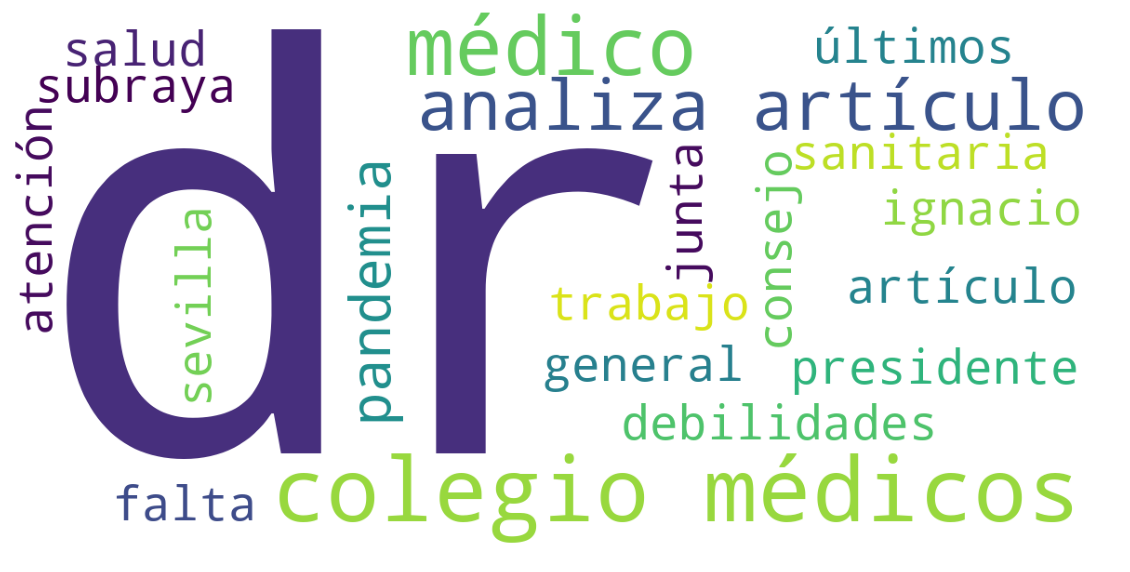

In [190]:
 wordcloud = WordCloud(background_color='white',
        stopwords=stop_words_sp,
        max_words=20,
        max_font_size=200, 
        scale=3,
        random_state=3).generate(str(commentaries))


wordcloud.recolor(random_state=1)
plt.figure(figsize=(20, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Procedamos a codificar las palabras

In [191]:
#Lematizador
lemmer=nltk.stem.WordNetLemmatizer()

#Función para lematizar uno a uno los wordtokens
def LemTokens(tokens):
  return [lemmer.lemmatize(token) for token in tokens]

#Removemos signos de puntuación
remove_punct_dict = dict((ord(punct),None) for punct in string.punctuation)

#Se le da un texto a la función y está le elimina los signos de puntuación y la tokeniza
def LemNormalize(text):
  return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [192]:
tokens = []
for i in range(0,len(commentaries)):

  token = LemNormalize(commentaries[i])
  tokens.append(token)      

In [193]:
tokenss=tokens[0]
for i in range(0,len(tokens[1])):
  tokenss.append(tokens[1][i])

for i in range(0,len(tokens[2])):
  tokenss.append(tokens[2][i])

for i in range(0,len(tokens[3])):
  tokenss.append(tokens[3][i])

for i in range(0,len(tokens[4])):
  tokenss.append(tokens[4][i])

for i in range(0,len(tokens[5])):
  tokenss.append(tokens[5][i])

for i in range(0,len(tokens[6])):
  tokenss.append(tokens[6][i])

for i in range(0,len(tokens[7])):
  tokenss.append(tokens[7][i])

for i in range(0,len(tokens[8])):
  tokenss.append(tokens[8][i])

In [194]:
from pandas import DataFrame
tokens = DataFrame(tokenss,columns=['words'])
#tokens=tokens.rename(columns={0:'words'})

## Frecuencia de palabras

In [195]:
tokens['words'].value_counts()

médicos           9
artículo          8
dr                7
colegio           6
analiza           5
                 ..
imprescindible    1
jacinto           1
extender          1
todos             1
independencia     1
Name: words, Length: 195, dtype: int64

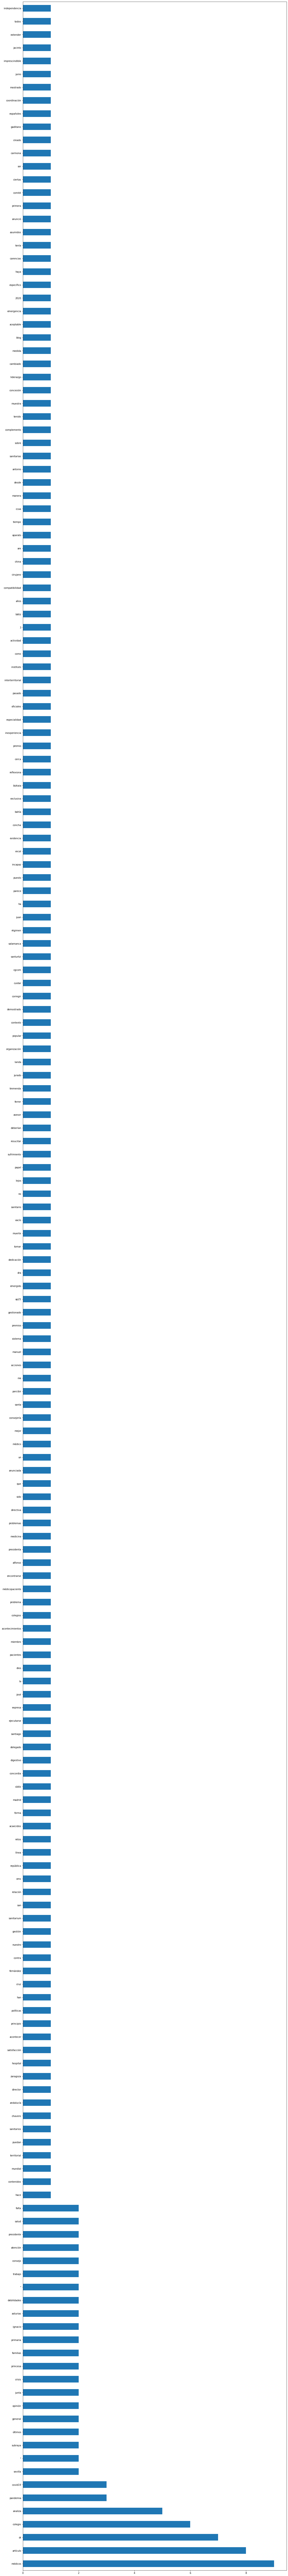

In [196]:
tokens['words'].value_counts().plot(kind='barh', figsize=(20, 200))

## Codificación (ONE-HOT) (Embedding layer)

In [197]:
from tensorflow.keras.preprocessing.text import one_hot

In [198]:
commentaries

['dr. jacinto bátiz, director instituto cuidar mejor hospital san juan dios santurtzi, analiza artículo sufrimiento creado pandemia covid19 pacientes encontrarse cerca muerte lejos familias',
 'dr. alfonso carmona, presidente colegio médicos sevilla, muestra satisfacción medida anunciada consejería salud familias junta andalucía extender complemento específico dedicación exclusiva, manera puedan percibir todos médicos independencia régimen compatibilidad actividad.',
 'dr. josé ignacio landa, cirujano general aparato digestivo miembro consejo asesor consejo general colegios oficiales médicos (cgcom), subraya artículo “la organización mundial salud (oms) últimos años mostrado ciertas debilidades república popular china no parece haya gestionado forma aceptable pandemia”',
 'dr. santiago santa cruz, presidente colegio médicos salamanca, analiza artículo falta médicos acciones políticas deberían ejecutarse corregir problema',
 'dr. antonio ares, delegado territorial bahía cádiz colegio mé

In [199]:
tokens = []
for i in range(0,len(commentaries)):

  token = LemNormalize(commentaries[i])
  tokens.append(token)      

In [200]:
for i in range(0,len(commentaries)):
  commentaries[i]=" ".join(tokens[i])

In [201]:
commentaries

['dr jacinto bátiz director instituto cuidar mejor hospital san juan dios santurtzi analiza artículo sufrimiento creado pandemia covid19 pacientes encontrarse cerca muerte lejos familias',
 'dr alfonso carmona presidente colegio médicos sevilla muestra satisfacción medida anunciada consejería salud familias junta andalucía extender complemento específico dedicación exclusiva manera puedan percibir todos médicos independencia régimen compatibilidad actividad',
 'dr josé ignacio landa cirujano general aparato digestivo miembro consejo asesor consejo general colegios oficiales médicos cgcom subraya artículo “ la organización mundial salud oms últimos años mostrado ciertas debilidades república popular china no parece haya gestionado forma aceptable pandemia ”',
 'dr santiago santa cruz presidente colegio médicos salamanca analiza artículo falta médicos acciones políticas deberían ejecutarse corregir problema',
 'dr antonio are delegado territorial bahía cádiz colegio médicos gaditano refl

In [202]:
### Tamaño del vocabulario
voc_size=10000

In [203]:
#Representación a través de vectores
onehot_repr=[one_hot(words,voc_size)for words in commentaries] 
print(onehot_repr)

[[6200, 2664, 5930, 8788, 1701, 746, 7643, 7446, 9675, 6725, 7145, 7057, 3652, 6837, 267, 8999, 8313, 3338, 5445, 9495, 7529, 1389, 2014, 7188], [6200, 1656, 7269, 7959, 2880, 4754, 5206, 8377, 1076, 5697, 6876, 5670, 5612, 7188, 516, 9188, 4604, 3175, 4296, 8063, 150, 8878, 1818, 2901, 1866, 4754, 8313, 5407, 5636, 2902], [6200, 6583, 927, 219, 4480, 2130, 2896, 5357, 5832, 4675, 6635, 4675, 2130, 3934, 9145, 4754, 7872, 5515, 6837, 2221, 5368, 2676, 696, 5612, 9315, 9213, 4056, 393, 9563, 3195, 3502, 8295, 4206, 485, 8811, 7169, 708, 7511, 3960, 8313, 7910], [6200, 8895, 3991, 8569, 7959, 2880, 4754, 9169, 3652, 6837, 1402, 4754, 740, 4974, 8247, 8530, 4367, 6271], [6200, 2655, 9442, 3998, 2476, 1185, 5798, 2880, 4754, 4560, 2136, 6837, 4606, 5610, 7982, 3193, 3275], [6200, 2706, 9739, 8756, 880, 2863, 3652, 6837, 9933, 6389, 2863, 1692, 8313, 5515, 2221, 7398, 6014, 694, 760, 4323, 6768, 3340, 1867, 4632, 3822, 7571, 6220, 483, 8864, 7910], [6200, 927, 5206, 6621, 9975, 7167, 2880, 

In [209]:
#Tamaño más gramde de oración para definir la matriz
print(len(tokens[8]))
print(tokens[8])

42
['dra', 'concha', 'ferrer', 'presidenta', 'colegio', 'médicos', 'zaragoza', 'analiza', 'artículo', 'acontecimientos', 'acaecidos', 'últimos', 'me', 'han', 'puesto', 'evidencia', 'debilidades', 'nuestro', 'sistema', 'sanitario', 'carencias', 'problemas', 'gestión', 'falta', 'coordinación', 'inexperiencia', 'un', 'comité', 'interterritorial', 'que', 'vacío', 'hace', 'tiempo', 'contenidos', 'asumidos', 'ccaa', 'sido', 'incapaz', 'tomar', 'liderazgo', 'tremenda', 'crisis']


In [210]:
#importamos librerías
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [211]:
#Definimos matriz
sent_length=42
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0 6200 2664 5930 8788 1701  746 7643 7446 9675 6725
  7145 7057 3652 6837  267 8999 8313 3338 5445 9495 7529 1389 2014 7188]
 [   0    0    0    0    0    0    0    0    0    0    0    0 6200 1656
  7269 7959 2880 4754 5206 8377 1076 5697 6876 5670 5612 7188  516 9188
  4604 3175 4296 8063  150 8878 1818 2901 1866 4754 8313 5407 5636 2902]
 [   0 6200 6583  927  219 4480 2130 2896 5357 5832 4675 6635 4675 2130
  3934 9145 4754 7872 5515 6837 2221 5368 2676  696 5612 9315 9213 4056
   393 9563 3195 3502 8295 4206  485 8811 7169  708 7511 3960 8313 7910]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0 6200 8895 3991 8569
  7959 2880 4754 9169 3652 6837 1402 4754  740 4974 8247 8530 4367 6271]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0 620